##  Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import joblib
import pickle  

import warnings
warnings.filterwarnings("ignore")

# data describtion
age - age of the person (in years)

sex - gender of the person (1 = male; 0 = female)

chest_pain_type - type of the chest pain
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic
        
resting_bp - blood pressure while resting (in mm Hg on admission to the hospital)

cholesterol - A person's serum cholesterol in mg/dl

fasting_blood_sugar - Blood sugar while fasting & [ > 120 mg/dl ] (1 = true; 0 = false)

restecg - ECG (electrocardiographic ) while resting
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

max_hr - Maximum heart rate achieved

exang - exercise-induced angina (1 = yes; 0 = no)
Exercise-induced angina (AP) is a common complaint of cardiac patients, particularly when exercising in the cold. It usually happens during activity (exertion) and goes away with rest or angina medication. For example, pain, when walking uphill or in cold weather, maybe angina. Stable angina pain is predictable and usually similar to previous episodes of chest pain.

oldpeak - ST depression induced by exercise relative to rest
Exercise-induced ST segment depression is considered a reliable ECG finding for the diagnosis of obstructive coronary atherosclerosis. ST-segment depression is believed as a common electrocardiographic sign of myocardial ischemia during exercise testing. Ischemia is generally defined as oxygen deprivation due to reduced perfusion. ST segment depression less than 0.5 mm is accepted in all leads. ST segment depression 0.5 mm or more is considered pathological.

slope - the slope of the peak exercise ST segment
        Value 0: upsloping
        Value 1: flat
        Value 2: downsloping

num_major_vessels - no. of major vessels (0-3) colored by flourosopy

thal - thalassemia
    0: normal
    1: fixed defect
    2: reversable defect
People with thalassemia can get too much iron in their bodies, either from the disease or from frequent blood transfusions. Too much iron can result in damage to your heart, liver & endocrine system, which includes hormone-producing glands that regulate processes throughout your body.

target :
    0 = no disease
    1 = disease

# Data Loading

In [2]:
df=pd.read_csv("data/heart.csv")
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration (Data Understanding)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
value_counts = {col: df[col].value_counts() for col in df.columns}

for col, counts in value_counts.items():
    print(f"Value count for this column {col}:")
    print(counts)
    print("\n")

Value count for this column age:
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64


Value count for this column sex:
sex
1    207
0     96
Name: count, dtype: int64


Value count for this column chest_pain_type:
chest_pain_type
0    143
2     87
1     50
3     23
Name: count, dtype: int64


Value count for this column resting_bp:
resting_bp
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94     

In [6]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

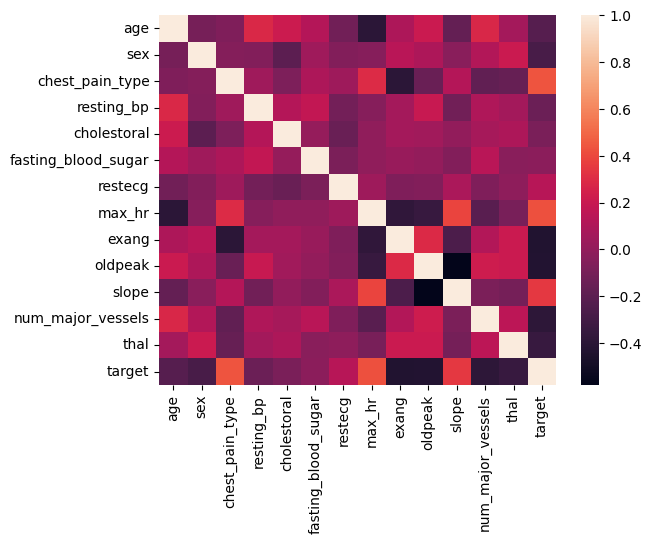

In [8]:
corr_matrix = df.corr(method='pearson')
ax=sns.heatmap(corr_matrix)

In [9]:
target_corr = corr_matrix[['target']]
target_corr_sorted = target_corr.abs().sort_values(by='target', ascending=False)
target_corr_sorted

,target
target,1.000000
exang,0.436757
chest_pain_type,0.433798
oldpeak,0.430696
max_hr,0.421741
num_major_vessels,0.391724
slope,0.345877
thal,0.344029
sex,0.280937
age,0.225439


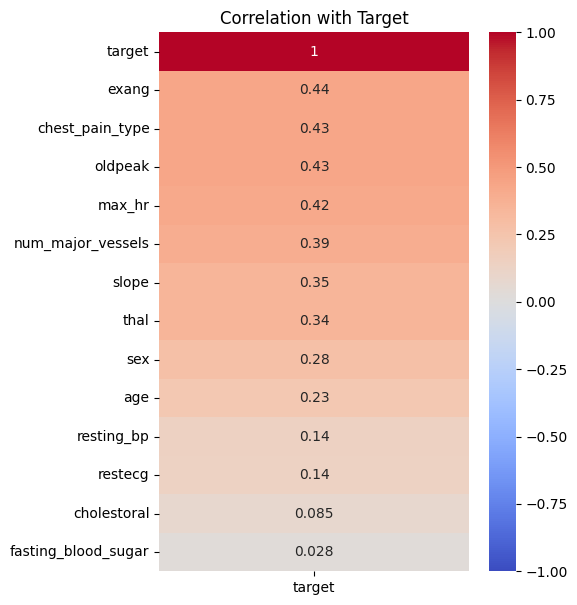

In [10]:
plt.figure(figsize=(5, len(target_corr)*0.5)) # adjust the size as needed
sns.heatmap(target_corr_sorted, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target')
plt.show()

In [11]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [12]:
columns_list=['age', 'sex', 'chest_pain_type', 'resting_bp', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope', 'thal' ]

X, y = df[columns_list], df['target']


In [13]:
# # Inisialisasi RobustScaler
# scaler = RobustScaler()

# X_scaled = scaler.fit_transform(X)
# X = pd.DataFrame(X_scaled, columns=X.columns)

# # Save the scaler to a file
# joblib.dump(scaler, 'robust_scaler.pkl')

# X

In [13]:
SC = StandardScaler()
X = SC.fit_transform(X)
joblib.dump(SC, 'Saved_Model_Status/Standard_scaler.pkl')

['Saved_Model_Status/Standard_scaler.pkl']

In [14]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ...,  1.08733806,
        -2.27457861, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ...,  2.12257273,
        -2.27457861, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.31091206,
         0.97635214, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  2.03630317,
        -0.64911323,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.13837295,
        -0.64911323,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.89686172,
        -0.64911323, -0.51292188]])

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
def evaluate_models(X, y):
    results = []
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Support Vector Machine', SVC()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ]

    # Evaluate each model
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((name, accuracy, precision, recall, f1))

    # Create a DataFrame to display results
    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
    display(df_styled)


In [22]:
evaluate_models(X,y)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.868852,0.868852,0.868852,0.868852
1,Decision Tree,0.819672,0.839180,0.819672,0.818309
2,Random Forest,0.885246,0.889539,0.885246,0.885246
3,Gradient Boosting,0.852459,0.863263,0.852459,0.852062
4,AdaBoost,0.836066,0.850982,0.836066,0.835271
5,Support Vector Machine,0.852459,0.856593,0.852459,0.852459
6,K-Nearest Neighbors,0.819672,0.823647,0.819672,0.819672
7,Naive Bayes,0.803279,0.809808,0.803279,0.803067
8,XGBoost,0.819672,0.829851,0.819672,0.819187


# After Show Many different Models : fit and training and save the model

In [106]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Result of Random Forest Classifier:-")
print("Accuracy : "+str(accuracy))
print("precision : "+str(precision))
print("recall : "+str(recall)  )
print("f1 : "+str(f1))

Result of Random Forest Classifier:-
Accuracy : 0.9016393442622951
precision : 0.9333333333333333
recall : 0.875
f1 : 0.9032258064516129


In [107]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[27  2]
 [ 4 28]]


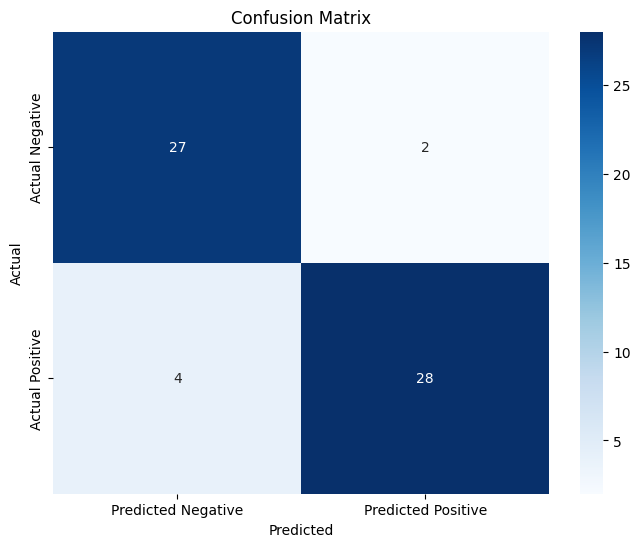

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [109]:
with open('Saved_Model_Status/HeartModelRandomForest','wb') as file: 
    pickle.dump(model,file) 
    print("Model Saved Successfully")

Model Saved Successfully


In [110]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')